# Imports

## Packages

In [1]:
import pandas as pd
import holidays
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

# import sklearn
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA

# Prophet model for time series forecast
# !pip install yfinance prophet

import warnings
warnings.filterwarnings('ignore')

Importing plotly failed. Interactive plots will not work.


In [2]:
from helper import *

## Data

In [14]:
df = pd.read_csv('./data/DK_2.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# df['Timestamp'] = pd.to_datetime(df['Timestamp'], format = '%Y%m%d %H:%M:%S')
# df['Date'] = pd.to_datetime(df['Date'], format = '%Y %m %d')

In [15]:
df.head().T

,0,1,2,3,4
Timestamp,2018-01-01 00:00:00,2018-01-01 01:00:00,2018-01-01 02:00:00,2018-01-01 03:00:00,2018-01-01 04:00:00
Date,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01
TTF,NaN,NaN,NaN,NaN,NaN
CO2,NaN,NaN,NaN,NaN,NaN
coal,NaN,NaN,NaN,NaN,NaN
Day-ahead prices,26.33,26.43,26.1,24.7,24.74
Forecasted Load,1591.0,1541.0,1497.0,1426.0,1378.0
Actual Load,1607.0,1566.0,1460.0,1424.0,1380.0
Solar,0.0,0.0,0.0,0.0,0.0
Wind Offshore,245.0,264.0,291.0,300.0,336.0


# Pre-processing

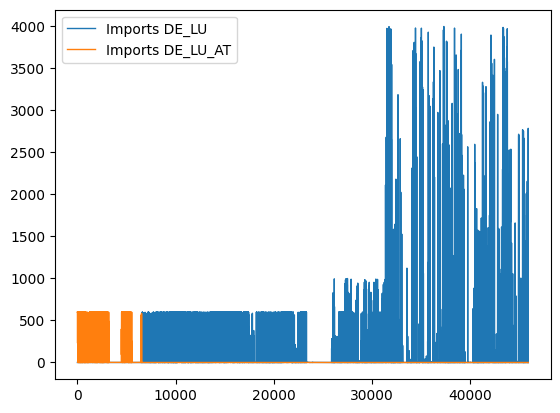

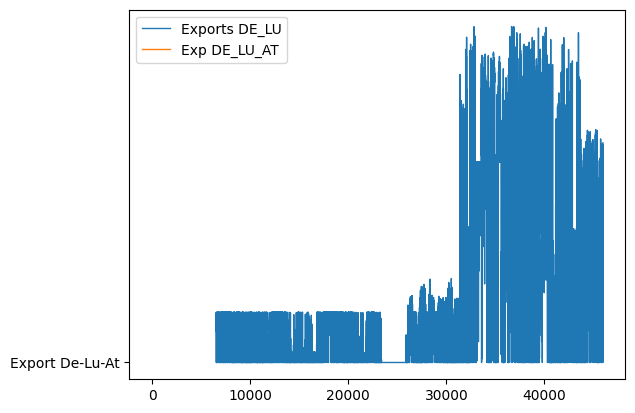

In [16]:
plt.plot(df['DE_LU'], linewidth = 1, label = 'Imports DE_LU')
plt.plot(df['DE_AT_LU'], linewidth = 1, label = 'Imports DE_LU_AT')
plt.legend()
plt.show()
plt.plot(df['Export De-Lu'], linewidth = 1, label = 'Exports DE_LU')
plt.plot(['Export De-Lu-At'], linewidth = 1, label = 'Exp DE_LU_AT')
plt.legend()
plt.show()

In [17]:
df['DE_LU_corr'] = df['DE_AT_LU'] + df['DE_LU']
df.drop(['DE_AT_LU', 'DE_LU'], axis = 1, inplace = True)

df['Export DE_LU_corr'] = df['Export De-Lu'] + df['Export De-Lu-At']
df.drop(['Export De-Lu', 'Export De-Lu-At'], axis = 1, inplace = True)

In [18]:
df = get_dt_info(df, 'Timestamp', yr = True, qt = True, mo = True, day = True, date = True, h = True)
df = get_dt_info(df, 'Date', w = True)
df.tail().T

,45979,45980,45981,45982,45983
Timestamp,2023-03-31 19:00:00,2023-03-31 20:00:00,2023-03-31 21:00:00,2023-03-31 22:00:00,2023-03-31 23:00:00
Date,2023-03-31 00:00:00,2023-03-31 00:00:00,2023-03-31 00:00:00,2023-03-31 00:00:00,2023-03-31 00:00:00
TTF,NaN,NaN,NaN,NaN,NaN
CO2,NaN,NaN,NaN,NaN,NaN
coal,177.25,177.25,177.25,177.25,177.25
Day-ahead prices,NaN,NaN,NaN,NaN,NaN
Forecasted Load,NaN,NaN,NaN,NaN,NaN
Actual Load,NaN,NaN,NaN,NaN,NaN
Solar,NaN,NaN,NaN,NaN,NaN
Wind Offshore,NaN,NaN,NaN,NaN,NaN


## Differentiate business and non-business days

In [19]:
# calendar of holidays in DK
dk_bus = pd.tseries.offsets.CustomBusinessDay(calendar = holidays.DK())

# range of business days, excluding weekends and holidays
dk_bus_days = pd.bdate_range(min(df['Date']), max(df['Date']), freq = dk_bus)
df['business'] = df['Date'].isin(dk_bus_days)

# Imputation

In [20]:
# check for NaN values
for col in df.columns:
    a = df[col].isna().sum()
    if a > 0:
        b = df[(df[col].isna()) & (df['business'] == True)]
        print(col, a, 'of which', len(b), 'in', len(b['Date'].unique()),'business days')

TTF 15672 of which 2568 in 107 business days
CO2 15096 of which 1992 in 83 business days
coal 13440 of which 336 in 14 business days
Day-ahead prices 24 of which 24 in 1 business days
Forecasted Load 25 of which 25 in 2 business days
Actual Load 25 of which 25 in 2 business days
Solar 313 of which 215 in 14 business days
Wind Offshore 121 of which 97 in 7 business days
Wind Onshore 169 of which 145 in 10 business days
DK_1 25 of which 25 in 2 business days
SE_4 25 of which 25 in 2 business days
Export DK1 25 of which 25 in 2 business days
Export SE4 25 of which 25 in 2 business days
DE_LU_corr 25 of which 25 in 2 business days
Export DE_LU_corr 45984 of which 32880 in 1370 business days


In [21]:
# in most cases, 'TTF' and 'CO2' NaN are in non-business days, where the price is the same as the last business day --> ffill
for col in ['TTF', 'CO2']:
    df[col].fillna(method = 'ffill', inplace = True)

In [22]:
# check for NaN values
for col in df.columns:
    a = df[col].isna().sum()
    if a > 0:
        b = df[(df[col].isna()) & (df['business'])]
        print(col, a, 'of which', len(b), 'in', len(b['Date'].unique()),'business days')

TTF 24 of which 24 in 1 business days
CO2 24 of which 24 in 1 business days
coal 13440 of which 336 in 14 business days
Day-ahead prices 24 of which 24 in 1 business days
Forecasted Load 25 of which 25 in 2 business days
Actual Load 25 of which 25 in 2 business days
Solar 313 of which 215 in 14 business days
Wind Offshore 121 of which 97 in 7 business days
Wind Onshore 169 of which 145 in 10 business days
DK_1 25 of which 25 in 2 business days
SE_4 25 of which 25 in 2 business days
Export DK1 25 of which 25 in 2 business days
Export SE4 25 of which 25 in 2 business days
DE_LU_corr 25 of which 25 in 2 business days
Export DE_LU_corr 45984 of which 32880 in 1370 business days


In [23]:
idx_drop = []
for col in ['TTF', 'CO2', 'Day-ahead prices']:
    print(col, df[df[col].isna()]['Date'].unique())
    idx_drop.append(df[df[col].isna()]['Date'].unique()[0])

idx_drop = set(idx_drop)

TTF <DatetimeArray>
['2018-01-01 00:00:00']
Length: 1, dtype: datetime64[ns]
CO2 <DatetimeArray>
['2018-01-01 00:00:00']
Length: 1, dtype: datetime64[ns]
Day-ahead prices <DatetimeArray>
['2023-03-31 00:00:00']
Length: 1, dtype: datetime64[ns]


In [24]:
# some NaNs are in the 1st and last day of the whole dataset, all observations for those days are dropped
df.drop(df[df['Date'].isin(idx_drop)].index, inplace = True)

In [25]:
# check for NaN values
cols_na = []
for col in df.columns:
    a = df[col].isna().sum()
    if a > 0:
        cols_na.append(col)
        b = df[df[col].isna()]['Date'].unique()
        print(col, a, '\nbusiness days', len(b), b)

coal 13416 
business days 559 <DatetimeArray>
['2018-01-06 00:00:00', '2018-01-07 00:00:00', '2018-01-13 00:00:00',
 '2018-01-14 00:00:00', '2018-01-20 00:00:00', '2018-01-21 00:00:00',
 '2018-01-27 00:00:00', '2018-01-28 00:00:00', '2018-02-03 00:00:00',
 '2018-02-04 00:00:00',
 ...
 '2023-02-25 00:00:00', '2023-02-26 00:00:00', '2023-03-04 00:00:00',
 '2023-03-05 00:00:00', '2023-03-11 00:00:00', '2023-03-12 00:00:00',
 '2023-03-18 00:00:00', '2023-03-19 00:00:00', '2023-03-25 00:00:00',
 '2023-03-26 00:00:00']
Length: 559, dtype: datetime64[ns]
Forecasted Load 1 
business days 1 <DatetimeArray>
['2023-03-30 00:00:00']
Length: 1, dtype: datetime64[ns]
Actual Load 1 
business days 1 <DatetimeArray>
['2023-03-30 00:00:00']
Length: 1, dtype: datetime64[ns]
Solar 289 
business days 21 <DatetimeArray>
['2020-03-01 00:00:00', '2020-03-02 00:00:00', '2021-10-07 00:00:00',
 '2021-10-08 00:00:00', '2021-10-13 00:00:00', '2021-10-14 00:00:00',
 '2022-04-30 00:00:00', '2022-05-01 00:00:00', '20

In [46]:
df_temp = df.copy()
df_temp[(df_temp['Hour'] == 17) & ('2020-09-03'< df_temp['Date']) & (df_temp['Date'] <'2020-09-15')]

,Timestamp,Date,TTF,CO2,coal,Day-ahead prices,Forecasted Load,Actual Load,Solar,Wind Offshore,...,Export SE4,DE_LU_corr,Export DE_LU_corr,Year,Quarter,Month,Day,Hour,Week,business
23465,2020-09-04 17:00:00,2020-09-04,11.680,28.13,49.00,47.95,4108.0,4151.0,90.0,924.0,...,0.0,2.0,NaN,2020,3,9,4,17,36,True
23489,2020-09-05 17:00:00,2020-09-05,11.680,28.13,NaN,37.29,3789.0,3807.0,88.0,1111.0,...,0.0,3.0,NaN,2020,3,9,5,17,36,False
23513,2020-09-06 17:00:00,2020-09-06,11.680,28.13,NaN,42.01,3837.0,3881.0,105.0,785.0,...,0.0,3.0,NaN,2020,3,9,6,17,36,False
23537,2020-09-07 17:00:00,2020-09-07,11.680,27.81,48.50,56.12,4312.0,4348.0,99.0,917.0,...,0.0,2.0,NaN,2020,3,9,7,17,37,True
23561,2020-09-08 17:00:00,2020-09-08,10.800,27.53,48.75,49.68,4300.0,4300.0,100.0,967.0,...,0.0,3.0,NaN,2020,3,9,8,17,37,True
23585,2020-09-09 17:00:00,2020-09-09,10.735,27.94,48.80,46.65,NaN,NaN,77.0,1204.0,...,0.0,2.0,NaN,2020,3,9,9,17,37,True
23609,2020-09-10 17:00:00,2020-09-10,10.515,29.15,49.75,65.81,4409.0,4263.0,95.0,398.0,...,0.0,2.0,NaN,2020,3,9,10,17,37,True
23633,2020-09-11 17:00:00,2020-09-11,10.495,28.99,50.75,56.76,4116.0,4185.0,76.0,869.0,...,0.0,0.0,NaN,2020,3,9,11,17,37,True
23657,2020-09-12 17:00:00,2020-09-12,10.495,28.99,NaN,33.02,3949.0,3948.0,73.0,1241.0,...,0.0,0.0,NaN,2020,3,9,12,17,37,False
23681,2020-09-13 17:00:00,2020-09-13,10.495,28.99,NaN,30.34,4018.0,4125.0,61.0,1205.0,...,0.0,0.0,NaN,2020,3,9,13,17,37,False


In [47]:
for i in range(24):
    check = df_temp[df_temp['Hour'] == i][cols_na].rolling(4, min_periods = 1, closed = 'left', axis = 'rows').mean()
    df_temp[cols_na].fillna(value = check, inplace = True)

In [48]:
df_temp.iloc[23555:23565, :]

,Timestamp,Date,TTF,CO2,coal,Day-ahead prices,Forecasted Load,Actual Load,Solar,Wind Offshore,...,Export SE4,DE_LU_corr,Export DE_LU_corr,Year,Quarter,Month,Day,Hour,Week,business
23579,2020-09-09 11:00:00,2020-09-09,10.735,27.94,48.8,29.82,4639.0,4625.0,146.0,1094.0,...,0.0,2.0,NaN,2020,3,9,9,11,37,True
23580,2020-09-09 12:00:00,2020-09-09,10.735,27.94,48.8,29.79,4641.0,4624.0,170.0,1020.0,...,0.0,2.0,NaN,2020,3,9,9,12,37,True
23581,2020-09-09 13:00:00,2020-09-09,10.735,27.94,48.8,29.21,4554.0,4549.0,171.0,973.0,...,0.0,2.0,NaN,2020,3,9,9,13,37,True
23582,2020-09-09 14:00:00,2020-09-09,10.735,27.94,48.8,29.17,4401.0,4390.0,196.0,1080.0,...,0.0,2.0,NaN,2020,3,9,9,14,37,True
23583,2020-09-09 15:00:00,2020-09-09,10.735,27.94,48.8,30.41,4386.0,4374.0,207.0,1178.0,...,0.0,2.0,NaN,2020,3,9,9,15,37,True
23584,2020-09-09 16:00:00,2020-09-09,10.735,27.94,48.8,32.45,NaN,NaN,157.0,1206.0,...,0.0,2.0,NaN,2020,3,9,9,16,37,True
23585,2020-09-09 17:00:00,2020-09-09,10.735,27.94,48.8,46.65,NaN,NaN,77.0,1204.0,...,0.0,2.0,NaN,2020,3,9,9,17,37,True
23586,2020-09-09 18:00:00,2020-09-09,10.735,27.94,48.8,46.88,4188.0,4184.0,12.0,1201.0,...,0.0,2.0,NaN,2020,3,9,9,18,37,True
23587,2020-09-09 19:00:00,2020-09-09,10.735,27.94,48.8,32.68,4060.0,4107.0,0.0,1227.0,...,0.0,2.0,NaN,2020,3,9,9,19,37,True
23588,2020-09-09 20:00:00,2020-09-09,10.735,27.94,48.8,28.59,3809.0,3890.0,0.0,1307.0,...,54.0,2.0,NaN,2020,3,9,9,20,37,True


In [16]:
# check for NaN values
for col in df_temp.columns:
    a = df_temp[col].isna().sum()
    if a > 0:
        b = df_temp[df_temp[col].isna()]['Date'].unique()
        print(col, a, '\nbusiness days', len(b), b)

Forecasted Load 2 
business days 1 <DatetimeArray>
['2020-09-09 00:00:00']
Length: 1, dtype: datetime64[ns]
Actual Load 2 
business days 1 <DatetimeArray>
['2020-09-09 00:00:00']
Length: 1, dtype: datetime64[ns]
Solar 432 
business days 32 <DatetimeArray>
['2020-03-01 00:00:00', '2020-03-02 00:00:00', '2020-07-15 00:00:00',
 '2020-07-16 00:00:00', '2020-08-03 00:00:00', '2020-08-04 00:00:00',
 '2021-10-07 00:00:00', '2021-10-08 00:00:00', '2021-10-13 00:00:00',
 '2021-10-14 00:00:00', '2022-04-30 00:00:00', '2022-05-01 00:00:00',
 '2022-07-29 00:00:00', '2022-07-30 00:00:00', '2022-08-11 00:00:00',
 '2022-08-12 00:00:00', '2022-08-13 00:00:00', '2022-08-14 00:00:00',
 '2022-08-16 00:00:00', '2022-08-17 00:00:00', '2022-08-24 00:00:00',
 '2022-08-25 00:00:00', '2022-08-28 00:00:00', '2022-08-29 00:00:00',
 '2022-08-31 00:00:00', '2022-09-01 00:00:00', '2022-09-04 00:00:00',
 '2022-09-05 00:00:00', '2022-10-09 00:00:00', '2022-10-10 00:00:00',
 '2022-11-17 00:00:00', '2022-11-26 00:00:00

In [17]:
df_temp.to_csv('./data/DK_2_filled.csv', index = False)

# Lagging

In [56]:
df_lag = pd.DataFrame(df_temp['Day-ahead prices'].copy())
df_lag['DAP-lag24'] = df_lag['Day-ahead prices'].shift(24) # 1 day
df_lag['DAP-lag25'] = df_lag['Day-ahead prices'].shift(25) # 25 h
df_lag['DAP-lag26'] = df_lag['Day-ahead prices'].shift(26) # 26 h
df_lag['DAP-lag27'] = df_lag['Day-ahead prices'].shift(27) # 27 h
df_lag['DAP-lag28'] = df_lag['Day-ahead prices'].shift(28) # 28 h
df_lag['DAP-lag29'] = df_lag['Day-ahead prices'].shift(29) # 29 h
df_lag['DAP-lag30'] = df_lag['Day-ahead prices'].shift(30) # 30 h
df_lag['DAP-lag31'] = df_lag['Day-ahead prices'].shift(31) # 31 h
df_lag['DAP-lag32'] = df_lag['Day-ahead prices'].shift(32) # 32 h
df_lag['DAP-lag33'] = df_lag['Day-ahead prices'].shift(32) # 33 h
df_lag['DAP-lag34'] = df_lag['Day-ahead prices'].shift(32) # 34 h
df_lag['DAP-lag35'] = df_lag['Day-ahead prices'].shift(32) # 35 h
df_lag['DAP-lag36'] = df_lag['Day-ahead prices'].shift(32) # 36 h
df_lag['DAP-lag48'] = df_lag['Day-ahead prices'].shift(24*2) # 2 days
df_lag['DAP-lag72'] = df_lag['Day-ahead prices'].shift(24*3) # 2 days
df_lag['DAP-lag168'] = df_lag['Day-ahead prices'].shift(24*7) # 1 week
df_lag['DAP-lag720'] = df_lag['Day-ahead prices'].shift(24*30) # 1 month
df_lag['DAP-lag2160'] = df_lag['Day-ahead prices'].shift(24*30*3) # 3 months
df_lag['DAP-lag8760'] = df_lag['Day-ahead prices'].shift(24*365) # 1 year
df_lag['DAP-lag-168'] = df_lag['Day-ahead prices'].shift(-24*7) # 1 week ahead

In [57]:
df_lag.head()

,Day-ahead prices,DAP-lag24,DAP-lag25,DAP-lag26,DAP-lag27,DAP-lag28,DAP-lag29,DAP-lag30,DAP-lag31,DAP-lag32,DAP-lag33,DAP-lag34,DAP-lag35,DAP-lag36,DAP-lag48,DAP-lag72,DAP-lag168,DAP-lag720,DAP-lag2160,DAP-lag8760
24,18.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,14.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,17.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,24.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,17.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


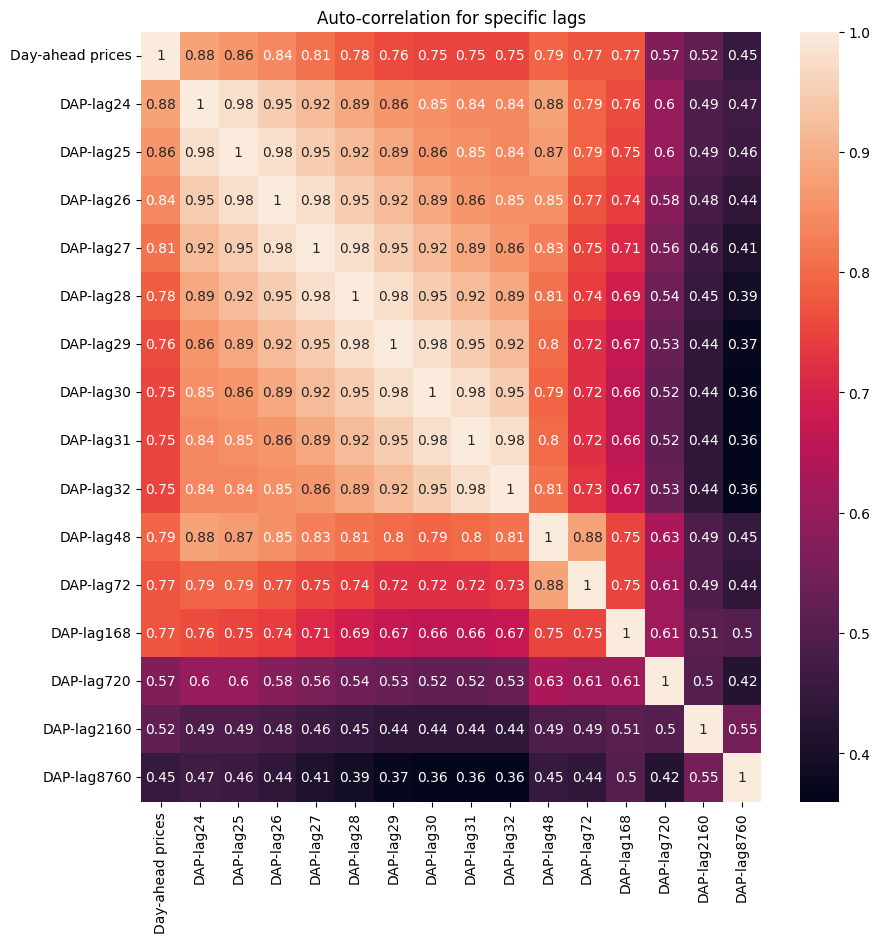

In [20]:
plt.figure(figsize = (10,10))
matrix = df_lag.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.title('Auto-correlation for specific lags')
plt.show()

In [28]:
lags = [24, 36, 48, 72, 168, -168]

In [38]:
df_lag = df.drop(['Timestamp'], axis =  1)
for lag in lags:
    df_lag['DAP-lag'+str(lag)] = df_lag['Day-ahead prices'].shift(lag)

In [39]:
matrix = df_lag.corr().round(1)

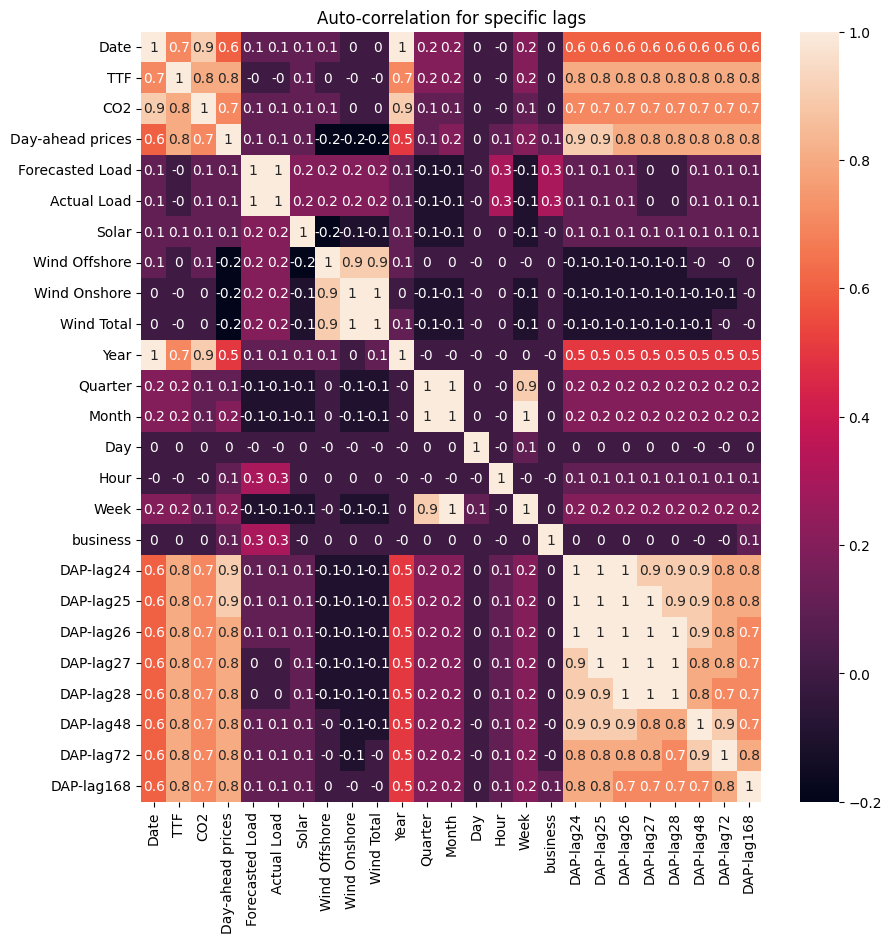

In [40]:
plt.figure(figsize = (10,10))
sns.heatmap(matrix, annot=True)
plt.title('Auto-correlation for specific lags')
plt.show()

In [ ]:
df_lag.to_csv('./data/DK_2_lagged.csv', index = False)

# PCA

In [21]:
df_lag_nan = df_lag.dropna(how = 'any', axis = 'index')

In [22]:
pca = PCA()
pca.fit(df_lag_nan)
print(pca.explained_variance_ratio_.cumsum())

[0.78084054 0.84960535 0.88632419 0.91588163 0.93953923 0.95896778
 0.97284078 0.9822865  0.98847226 0.99439199 0.99686373 0.99809331
 0.9987671  0.99925173 0.9996467  1.        ]


## Log transform

$\log$ can't deal with negative values, thus, check how many there are:

In [23]:
df_temp[df_temp['Day-ahead prices'] < 0].describe()

,Timestamp,Date,TTF,CO2,Day-ahead prices,Forecasted Load,Actual Load,Solar,Wind Offshore,Wind Onshore,Wind Total,Year,Quarter,Month,Day,Hour,Week
count,250,250,250.000000,250.00000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.0
mean,2019-10-01 14:40:04.800000,2019-10-01 07:29:16.800000,18.467968,25.90908,-6.779240,3364.228000,3369.91600,163.588000,887.296000,2643.288000,3530.584000,2019.412000,1.904000,4.656000,13.26400,7.180000,18.16
min,2018-01-03 03:00:00,2018-01-03 00:00:00,3.890000,8.20000,-48.290000,2234.000000,2148.00000,0.000000,400.000000,686.000000,1097.000000,2018.000000,1.000000,1.000000,1.00000,0.000000,1.0
25%,2019-01-05 04:15:00,2019-01-04 18:00:00,9.325000,22.18250,-9.610000,3074.000000,3091.50000,0.000000,582.500000,2317.750000,3104.000000,2019.000000,1.000000,2.000000,5.00000,3.000000,7.0
50%,2019-12-08 07:30:00,2019-12-08 00:00:00,15.410000,24.31000,-4.925000,3323.500000,3336.00000,0.000000,872.000000,2683.500000,3581.500000,2019.000000,2.000000,4.000000,12.50000,5.000000,14.0
75%,2020-05-23 21:45:00,2020-05-23 18:00:00,19.170000,27.06000,-1.720000,3618.500000,3643.75000,247.500000,1166.000000,3135.500000,4003.750000,2020.000000,2.000000,5.000000,22.75000,12.750000,21.75
max,2022-07-16 13:00:00,2022-07-16 00:00:00,159.565000,85.38000,-0.010000,5051.000000,5053.00000,1297.000000,1501.000000,3777.000000,5163.000000,2022.000000,4.000000,12.000000,31.00000,23.000000,52.0
std,NaN,NaN,19.460230,11.88238,8.079543,422.847756,431.74731,282.648295,316.740123,633.984003,752.560926,0.897484,1.111633,3.495503,9.22163,5.999632,15.291229


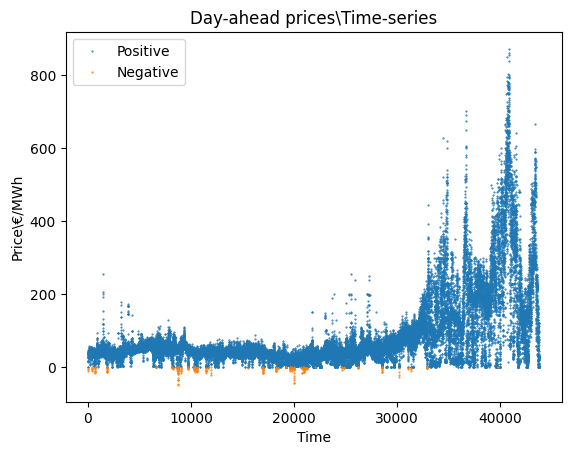

In [24]:
plt.plot(df_temp[df_temp['Day-ahead prices'] >= 0]['Day-ahead prices'], label = 'Positive', linewidth = 0, marker = 'o', ms = 0.5)
plt.plot(df_temp[df_temp['Day-ahead prices'] < 0]['Day-ahead prices'], label = 'Negative', linewidth = 0, marker = 'o', ms = 0.5)
plt.title('Day-ahead prices\Time-series')
plt.xlabel('Time')
plt.ylabel('Price\€/MWh')
plt.legend()
plt.show()

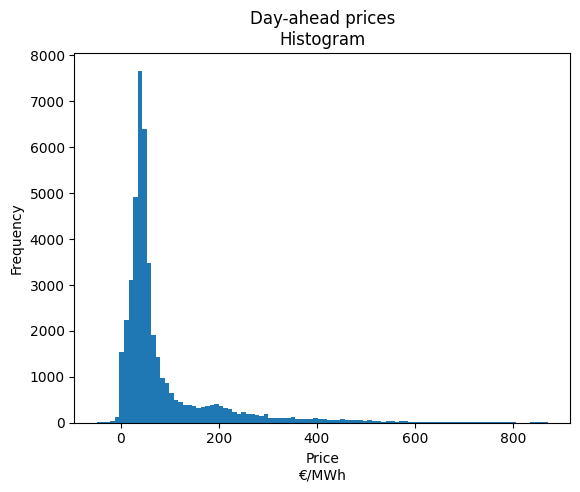

In [25]:
df_temp['Day-ahead prices'].plot.hist(bins = 100)
plt.xlabel('Price\n€/MWh')
plt.title('Day-ahead prices\nHistogram')
plt.show()

In [26]:
df_log = df_temp[df_temp['Day-ahead prices'] > 0].copy()
df_log['Day-ahead prices log'] = np.log(df_log['Day-ahead prices'])

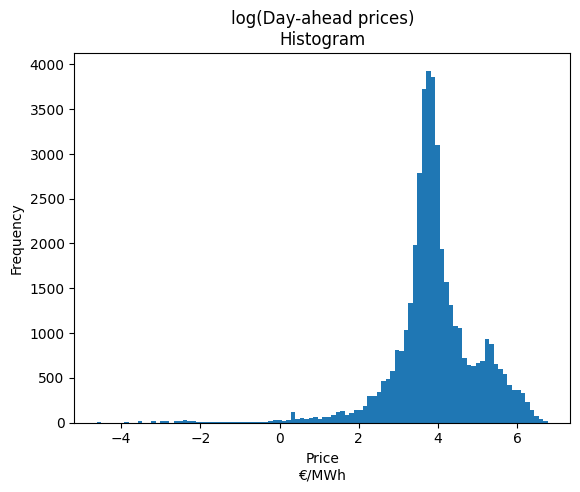

In [27]:
df_log['Day-ahead prices log'].plot.hist(bins = 100)
plt.xlabel('Price\n€/MWh')
plt.title('log(Day-ahead prices)\nHistogram')
plt.show()